In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact, interact_manual

In [3]:
from IPython.display import display

plt.style.use('fivethirtyeight')

## Read Dataset

In [4]:
data = pd.read_csv('movie_metadata.csv')

In [5]:
data.shape

(5043, 28)

In [6]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
data=data.drop(['color',
               'director_facebook_likes',
               'actor_3_facebook_likes',
               'actor_1_facebook_likes',
               'cast_total_facebook_likes',
               'facenumber_in_poster',
               'movie_imdb_link',
               'content_rating',
               'actor_2_facebook_likes',
               'aspect_ratio',
               'plot_keywords'], axis=1)

In [9]:
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
country                    0.10
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [10]:
#gross and budget has high number of null values

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [11]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
country                    0
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [12]:
data=data[data.isnull().sum(axis=1)<=2]

In [13]:
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
country                   0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [14]:
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace=True)

In [15]:
data['language'].fillna(data['language'].mode()[0],inplace=True)

In [16]:
data['actor_2_name'].fillna('unknown actor', inplace=True)
data['actor_3_name'].fillna('unknown actor', inplace=True)

In [17]:
data.isnull().sum().sum()

0

## Feature Engineering

In [18]:
data['gross']=data['gross']/1000000
data['budget']=data['budget']/1000000

In [19]:
data['profit']=data['gross']-data['budget']

In [20]:
#top 10 profit given actors
data[['profit', 'actor_1_name', 'actor_2_name']].sort_values(by='profit', ascending=False).head(10)

,profit,actor_1_name,actor_2_name
0,523.505847,CCH Pounder,Joel David Moore
29,502.177271,Bryce Dallas Howard,Judy Greer
26,458.672302,Leonardo DiCaprio,Kate Winslet
3024,449.935665,Harrison Ford,Peter Cushing
3080,424.449459,Henry Thomas,Dee Wallace
794,403.279547,Chris Hemsworth,Robert Downey Jr.
17,403.279547,Chris Hemsworth,Robert Downey Jr.
509,377.783777,Matthew Broderick,Nathan Lane
240,359.544677,Natalie Portman,Liam Neeson
66,348.316061,Christian Bale,Heath Ledger


In [21]:
#top 10 profit given moview
data[['profit', 'movie_title']].sort_values(by='profit', ascending=False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [22]:
#with the above results we came to know we have duplicates in our data
data.drop_duplicates(subset=None, inplace= True, keep='first')

In [23]:
data.shape

(3853, 18)

In [24]:
#checking profit given directors once again
data[['profit', 'movie_title']].sort_values(by='profit', ascending=False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


In [25]:
def language(x):
    if x=='English':
        return 'English'
    else:
        return 'Foreign'
    
data['language']=data['language'].apply(language)

data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3853 non-null   object 
 1   num_critic_for_reviews  3853 non-null   float64
 2   duration                3853 non-null   float64
 3   actor_2_name            3853 non-null   object 
 4   gross                   3853 non-null   float64
 5   genres                  3853 non-null   object 
 6   actor_1_name            3853 non-null   object 
 7   movie_title             3853 non-null   object 
 8   num_voted_users         3853 non-null   int64  
 9   actor_3_name            3853 non-null   object 
 10  num_user_for_reviews    3853 non-null   float64
 11  language                3853 non-null   object 
 12  country                 3853 non-null   object 
 13  budget                  3853 non-null   float64
 14  title_year              3853 non-null   

In [27]:
def duration(x):
    if x >=90:
        return 'long'
    else:
        return 'short'

data['duration']=data['duration'].apply(duration)

data['duration'].value_counts()

long     3397
short     456
Name: duration, dtype: int64

In [28]:
data['MovieGenre']=data['genres'].str.split('|')

data['genre1']=data['MovieGenre'].apply(lambda x: x[0])
data['genre2']=data['MovieGenre'].apply(lambda x: x[1] if len(x)> 1 else x[0])
data['genre3']=data['MovieGenre'].apply(lambda x: x[2] if len(x)> 2 else x[0])
data['genre4']=data['MovieGenre'].apply(lambda x: x[3] if len(x)> 3 else x[0])

data[['genres','genre1','genre2','genre3','genre4']]

,genres,genre1,genre2,genre3,genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action
...,...,...,...,...,...
5033,Drama|Sci-Fi|Thriller,Drama,Sci-Fi,Thriller,Drama
5034,Thriller,Thriller,Thriller,Thriller,Thriller
5035,Action|Crime|Drama|Romance|Thriller,Action,Crime,Drama,Romance
5037,Comedy|Drama,Comedy,Drama,Comedy,Comedy


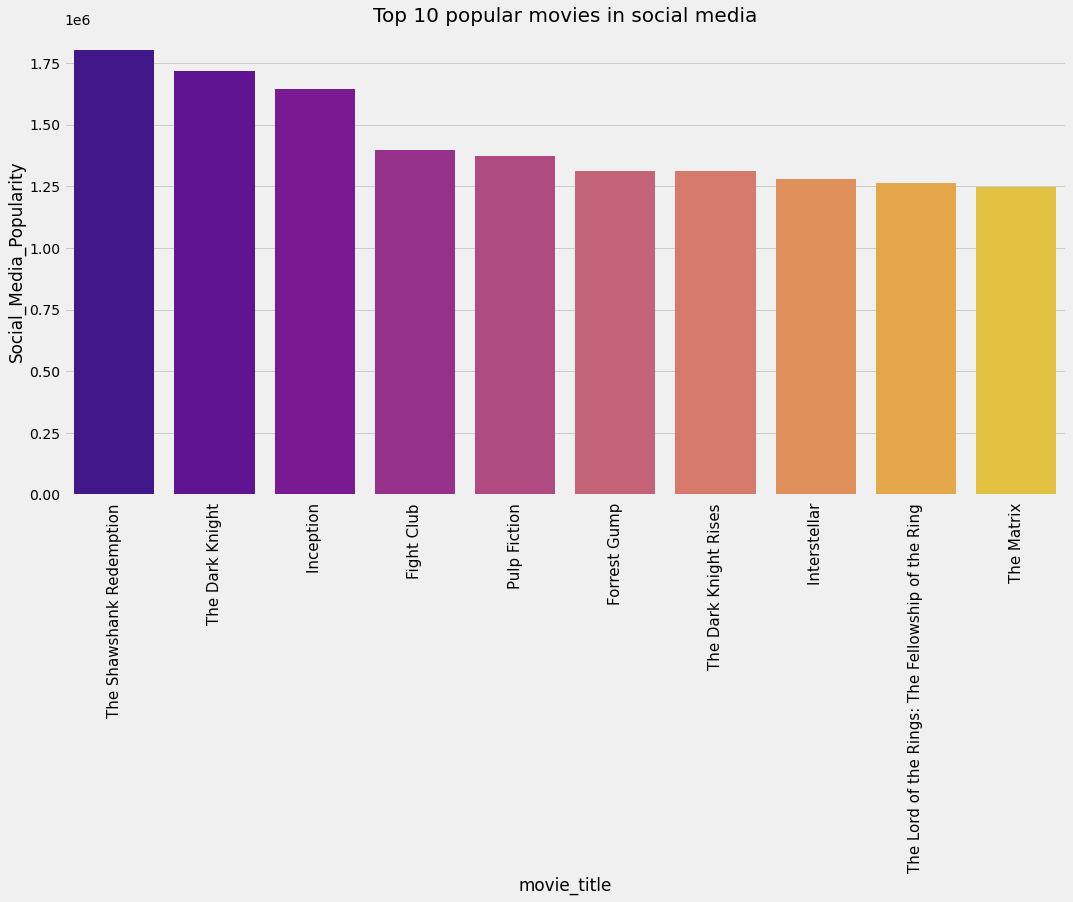

In [29]:
data['Social_Media_Popularity'] = (data['num_voted_users']+data['movie_facebook_likes']+data['num_user_for_reviews'])

x=data[['movie_title', 'Social_Media_Popularity']].sort_values(by= 'Social_Media_Popularity', ascending =False).head(10)

plt.figure(figsize=(16,8))
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'plasma')
plt.title('Top 10 popular movies in social media', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.show()


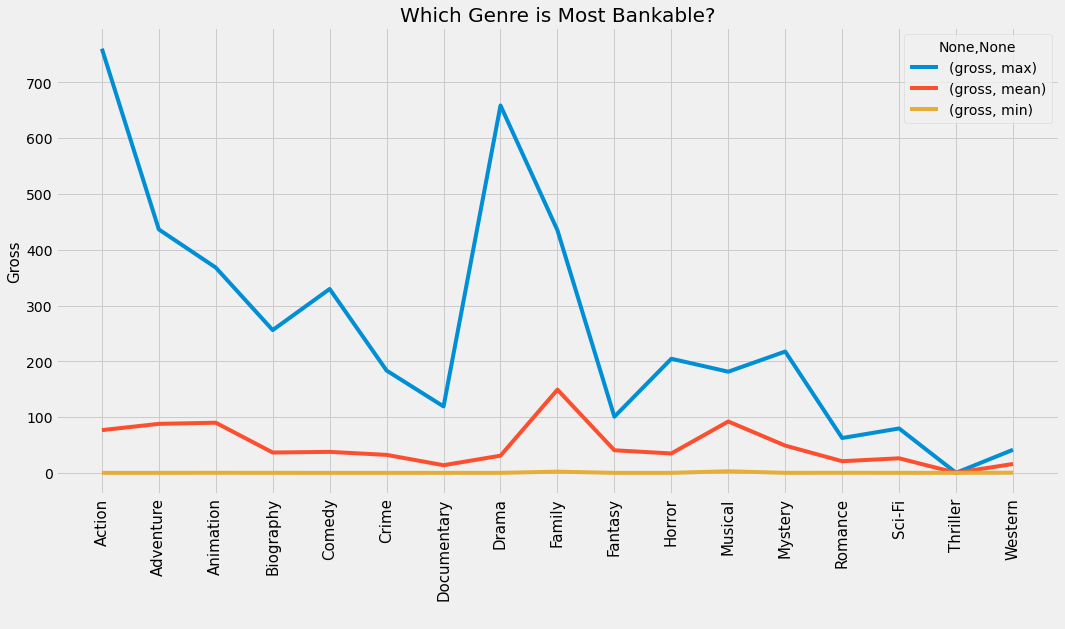

In [30]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['genre1','gross',]].groupby(['genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
plt.rcParams['figure.figsize'] = (16, 8)
data[['genre1','gross',]].groupby(['genre1']).agg(['max','mean','min']).plot(kind = 'line')
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()


In [31]:
print('The Most Profitable Movie from each Genre')
data.loc[data.groupby(data['genre1'])['profit'].idxmax()][['genre1','movie_title','gross', 'profit']].style.background_gradient(cmap = 'copper')

The Most Profitable Movie from each Genre


,genre1,movie_title,gross,profit
0,Action,Avatar,760.505847,523.505847
509,Adventure,The Lion King,422.783777,377.783777
521,Animation,Despicable Me 2,368.049635,292.049635
1403,Biography,The Blind Side,255.950375,226.950375
836,Comedy,Forrest Gump,329.691196,274.691196
3466,Crime,The Godfather,134.821952,128.821952
3583,Documentary,Fahrenheit 9/11,119.078393,113.078393
26,Drama,Titanic,658.672302,458.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459,424.449459
2485,Fantasy,The Others,96.471845,79.471845


In [32]:
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','profit']].groupby(['language','title_year']).agg('sum').sort_values(by = 'profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

Most Profitable Years in Box Office


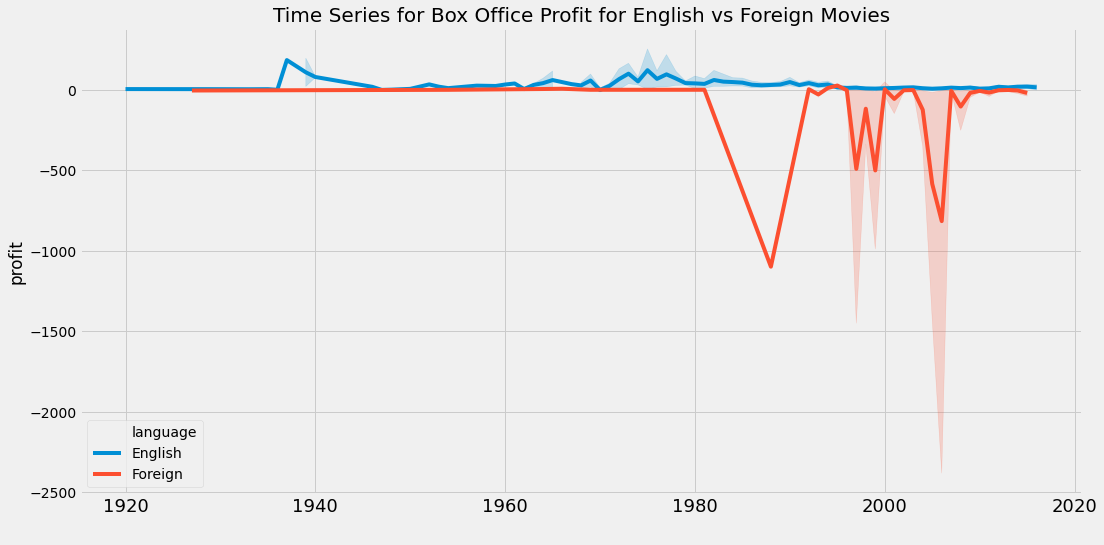

In [33]:
sns.lineplot(data['title_year'], data['profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

In [34]:
#movies with  huge loss
print('movies with huge loss in each genre')

data.loc[data.groupby(data['genre1'])['profit'].idxmin()][['genre1', 'country','movie_title', 'profit']].style.background_gradient(cmap = 'copper')

movies with huge loss in each genre


,genre1,country,movie_title,profit
2334,Action,Japan,Steamboy,-2127.109510
2323,Adventure,Japan,Princess Mononoke,-2397.701809
175,Animation,Australia,Happy Feet 2,-71.007672
2813,Biography,France,Amen.,-102.725701
2988,Comedy,South Korea,The Host,-12213.298588
3859,Crime,South Korea,Lady Vengeance,-4199.788333
1782,Documentary,France,Winged Migration,-149.237822
3005,Drama,Hungary,Fateless,-2499.804112
2382,Family,USA,The Nutcracker,-16.880006
801,Fantasy,USA,The Mortal Instruments: City of Bones,-28.834579


In [35]:
print ('huge loss given films overall')
display(data[['movie_title','profit']].sort_values(by = 'profit').head(10).style.background_gradient(cmap = 'Greens'))

huge loss given films overall


,movie_title,profit
2988,The Host,-12213.298588
3859,Lady Vengeance,-4199.788333
3005,Fateless,-2499.804112
2323,Princess Mononoke,-2397.701809
2334,Steamboy,-2127.109510
3423,Akira,-1099.560838
4542,Godzilla 2000,-989.962610
3851,Tango,-698.312689
3075,Kabhi Alvida Naa Kehna,-696.724557
3273,Kites,-598.397534


In [36]:
IMDb_Top_200 = data.sort_values(by = 'imdb_score', ascending = False)
IMDb_Top_200 = IMDb_Top_200.loc[IMDb_Top_200.num_voted_users>7000]
IMDb_Top_200 = IMDb_Top_200.iloc[:200, ]
IMDb_Top_200['Rank'] = range(1,201)

pd.set_option('max_rows', 200)
print('Top 200 movies based on imdbscore and reviews')
IMDb_Top_200[['movie_title','director_name', 'imdb_score']].reset_index()

Top 200 movies based on imdbscore and reviews


,index,movie_title,director_name,imdb_score
0,1937,The Shawshank Redemption,Frank Darabont,9.3
1,3466,The Godfather,Francis Ford Coppola,9.2
2,2837,The Godfather: Part II,Francis Ford Coppola,9.0
3,66,The Dark Knight,Christopher Nolan,9.0
4,4498,"The Good, the Bad and the Ugly",Sergio Leone,8.9
5,339,The Lord of the Rings: The Return of the King,Peter Jackson,8.9
6,3355,Pulp Fiction,Quentin Tarantino,8.9
7,1874,Schindler's List,Steven Spielberg,8.9
8,2051,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,8.8
9,270,The Lord of the Rings: The Fellowship of the R...,Peter Jackson,8.8


In [37]:
top_foreign_movies=data.loc[data['language']=='Foreign'].sort_values(by='gross', ascending=False).head(10)
print('highest gross given foreign movies')
display(top_foreign_movies[['movie_title','language','gross','budget','profit']].style.background_gradient(cmap = 'copper'))

top_foreign_movies=data.loc[data['language']=='Foreign'].sort_values(by='profit', ascending=False).head(10)
print('highest profit given foreign movies')
display(top_foreign_movies[['movie_title','language','gross','budget','profit']].style.background_gradient(cmap = 'copper'))

top_foreign_movies=data.loc[data['language']=='Foreign'].sort_values(by='imdb_score', ascending=False).head(10)
print('highest imdb rated foreign movies')
display(top_foreign_movies[['movie_title','language','imdb_score']].style.background_gradient(cmap = 'copper'))

highest gross given foreign movies


,movie_title,language,gross,budget,profit
2605,"Crouching Tiger, Hidden Dragon",Foreign,128.067808,15.000000,113.067808
4024,March of the Penguins,Foreign,77.413017,8.000000,69.413017
377,The Interpreter,Foreign,72.515360,80.000000,-7.484640
1236,Apocalypto,Foreign,50.859889,40.000000,10.859889
484,The Legend of Zorro,Foreign,45.356386,75.000000,-29.643614
3705,Instructions Not Included,Foreign,44.456509,5.000000,39.456509
2551,Pan's Labyrinth,Foreign,37.623143,13.500000,24.123143
1298,Amélie,Foreign,33.201661,77.000000,-43.798339
3436,Rumble in the Bronx,Foreign,32.333860,7.500000,24.833860
4000,The Secret in Their Eyes,Foreign,20.167424,2.000000,18.167424


highest profit given foreign movies


,movie_title,language,gross,budget,profit
2605,"Crouching Tiger, Hidden Dragon",Foreign,128.067808,15.000000,113.067808
4024,March of the Penguins,Foreign,77.413017,8.000000,69.413017
3705,Instructions Not Included,Foreign,44.456509,5.000000,39.456509
3436,Rumble in the Bronx,Foreign,32.333860,7.500000,24.833860
2551,Pan's Labyrinth,Foreign,37.623143,13.500000,24.123143
4000,The Secret in Their Eyes,Foreign,20.167424,2.000000,18.167424
3731,Addicted,Foreign,17.382982,5.000000,12.382982
3740,Y Tu Mamá También,Foreign,13.622333,2.000000,11.622333
1236,Apocalypto,Foreign,50.859889,40.000000,10.859889
4255,The Legend of Drunken Master,Foreign,11.546543,2.000000,9.546543


highest imdb rated foreign movies


,movie_title,language,imdb_score
4498,"The Good, the Bad and the Ugly",Foreign,8.900000
4029,City of God,Foreign,8.700000
4747,Seven Samurai,Foreign,8.700000
2373,Spirited Away,Foreign,8.600000
4921,Children of Heaven,Foreign,8.500000
4259,The Lives of Others,Foreign,8.500000
3931,Samsara,Foreign,8.500000
4659,A Separation,Foreign,8.400000
1329,Baahubali: The Beginning,Foreign,8.400000
2970,Das Boot,Foreign,8.400000


In [41]:
top_directors=data.pivot_table(values = 'imdb_score', index = 'director_name', aggfunc = 'max').sort_values(by='imdb_score', ascending=False)
top_directors.iloc[:10, ]

,imdb_score
director_name,
Frank Darabont,9.3
Francis Ford Coppola,9.2
Christopher Nolan,9.0
Steven Spielberg,8.9
Peter Jackson,8.9
Sergio Leone,8.9
Quentin Tarantino,8.9
Irvin Kershner,8.8
David Fincher,8.8


,title_year,movie_title,gross
0,2009,Avatar,760.505847
26,1997,Titanic,658.672302
29,2015,Jurassic World,652.177271
17,2012,The Avengers,623.279547
66,2008,The Dark Knight,533.316061
...,...,...,...
4758,2012,Detention of the Dead,0.001332
4915,2006,The Trials of Darryl Hunt,0.001111
4606,2006,In Her Line of Fire,0.000721
4607,2001,The Jimmy Show,0.000703


In [46]:
data.loc[data.groupby(data['title_year'])['profit'].idxmax()][['title_year','movie_title', 'profit']].style.background_gradient(cmap = 'copper')

,title_year,movie_title,profit
4958,1920,Over the Hill to the Poorhouse,2.900000
2734,1927,Metropolis,-5.973565
4812,1929,The Broadway Melody,2.429000
4786,1933,42nd Street,1.861000
4706,1935,Top Hat,2.391000
4427,1936,Modern Times,-1.336755
4449,1937,Snow White and the Seven Dwarfs,182.925485
3970,1939,Gone with the Wind,194.678278
1143,1940,Pinocchio,81.700000
4238,1946,The Best Years of Our Lives,21.550000


In [47]:
data.loc[data.groupby(data['title_year'])['gross'].idxmax()][['title_year','movie_title', 'gross']].style.background_gradient(cmap = 'copper')

,title_year,movie_title,gross
4958,1920,Over the Hill to the Poorhouse,3.000000
2734,1927,Metropolis,0.026435
4812,1929,The Broadway Melody,2.808000
4786,1933,42nd Street,2.300000
4706,1935,Top Hat,3.000000
4427,1936,Modern Times,0.163245
4449,1937,Snow White and the Seven Dwarfs,184.925485
3970,1939,Gone with the Wind,198.655278
1143,1940,Pinocchio,84.300000
4238,1946,The Best Years of Our Lives,23.650000


In [53]:
#yearwise top 10 movies
@interact
def yearly_top_10_movies(year = data['title_year'].values ):
    return data[data['title_year'] == year][['movie_title',
              'imdb_score']].sort_values(by = 'imdb_score', 
                     ascending = False).head(10).style.background_gradient(cmap = 'Greens')

interactive(children=(Dropdown(description='year', options=(2009, 2007, 2015, 2012, 2012, 2007, 2010, 2015, 20…

In [55]:
@interact
def yearly_top_10_movies(director = data['director_name'].values ):
    return data[data['director_name'] == director][['title_year','movie_title',
              'imdb_score']].sort_values(by = 'imdb_score', 
                     ascending = False).head(10).style.background_gradient(cmap = 'Greens')

interactive(children=(Dropdown(description='director', options=('James Cameron', 'Gore Verbinski', 'Sam Mendes…

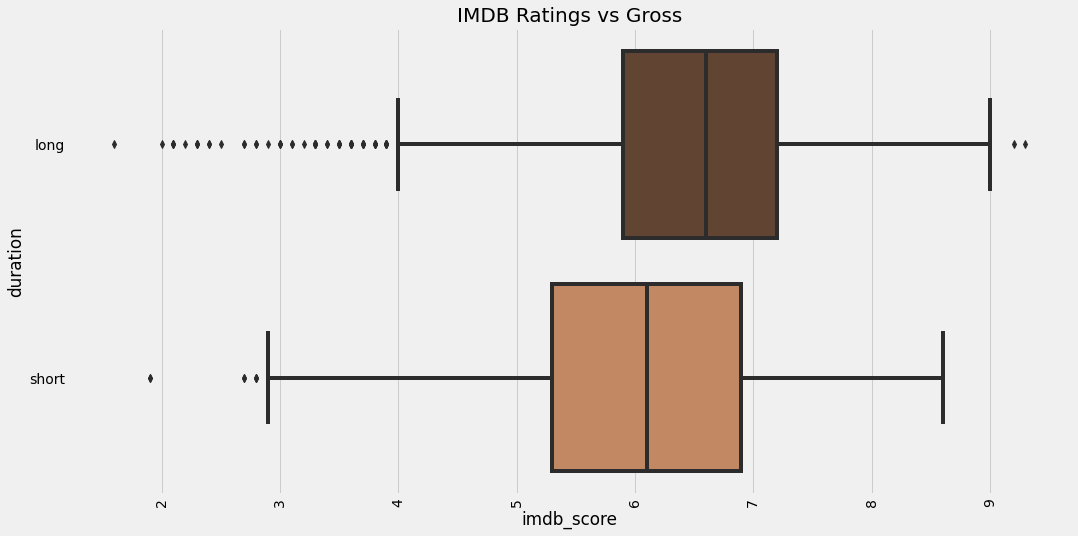

In [60]:
sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## Recommending Movies based on Languages

In [62]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)
recommend_lang('English')

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
683,English,Fight Club,8.8
270,English,The Lord of the Rings: The Fellowship of the R...,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


In [70]:
def recommend_actor(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b=data[['movie_title','imdb_score']][data['actor_2_name']==x]
    c=data[['movie_title','imdb_score']][data['actor_3_name']==x]
    
    y=a.append(b)
    y=y.append(c)
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)
recommend_actor('Brad Pitt')

,movie_title,imdb_score
683,Fight Club,8.8
1600,Se7en,8.6
3017,Snatch,8.3
588,Inglourious Basterds,8.3
2898,True Romance,8.0
101,The Curious Case of Benjamin Button,7.8
400,Ocean's Eleven,7.8
470,Fury,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
956,Moneyball,7.6


In [72]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [73]:
genres = x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)
recommendation_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

In [77]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [78]:
def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)
recommendation_movie('The Shawshank Redemption')

movie_title
NaN                                  1.000000
Along Came a Spider                  1.000000
Secondhand Lions                     1.000000
No Country for Old Men               1.000000
The Shawshank Redemption             1.000000
Aloha                                1.000000
Water for Elephants                  1.000000
I Can Do Bad All by Myself           1.000000
NaN                                  1.000000
8 Mile                               1.000000
The Producers                        1.000000
Journey 2: The Mysterious Island     1.000000
Bandslam                             1.000000
22 Jump Street                       1.000000
All the King's Men                   1.000000
A Simple Wish                        1.000000
The Grudge 2                         1.000000
Zathura: A Space Adventure           1.000000
Meet the Fockers                     1.000000
Monster House                        0.796819
dtype: float64